In [ ]:
!pip install umap-learn

In [60]:
# Step 1: Import necessary libraries
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from umap import UMAP
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split

In [31]:
# Step 2: Load CIFAR-10 dataset
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())


Files already downloaded and verified


In [32]:
X = np.array(dataset.data)
y = np.array(dataset.targets)

In [35]:
# Reduce Dataset Size (Optional)
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.99, random_state=42)


In [36]:
# Define manifold learning algorithms
manifold_algorithms = {
    "PCA": PCA(n_components=3),
    "Isomap": Isomap(n_components=3),
    "LLE": LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='standard'),
    "MDS": MDS(n_components=3),
    "SpectralEmbedding": SpectralEmbedding(n_components=3),
    "t-SNE": TSNE(n_components=3, perplexity=30),
    "UMAP": UMAP(n_components=3)
}


In [37]:
# Function to fit and transform data with each algorithm
def fit_transform_algorithm(name, algorithm, X):
    return algorithm.fit_transform(X)


In [43]:
from joblib import Parallel, delayed


In [44]:
# Parallelize fitting and transforming data with each algorithm
transformed_data = Parallel(n_jobs=-1)(
    delayed(fit_transform_algorithm)(name, algorithm, X_train.reshape(len(X_train), -1))
    for name, algorithm in manifold_algorithms.items()
)

In [50]:
# Function to plot 3D embeddings
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(plticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(plticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(plticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


In [51]:
# Function to plot 2D embeddings
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(6, 6), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)


In [52]:
# Plot 3D embeddings
for i, (name, data) in enumerate(zip(manifold_algorithms.keys(), transformed_data)):
    plot_3d(data, y_train, f"{name} 3D Embedding")


In [53]:
# Convert to 2D embeddings and plot
for name, data in zip(manifold_algorithms.keys(), transformed_data):
    data_2d = data[:, :2]  # Extract only the first 2 dimensions for 2D plot
    plot_2d(data_2d, y_train, f"{name} 2D Embedding")

In [56]:
# Function to plot 3D embeddings for all algorithms
def plot_3d_comparison(transformed_data, y_train):
    fig, axs = plt.subplots(3, 3, figsize=(18, 18))
    fig.suptitle("Comparison of 3D Embeddings", fontsize=20)
    for ax, (name, data) in zip(axs.flat, transformed_data.items()):
        x, y, z = data.T
        ax.scatter(x, y, z, c=y_train, cmap='viridis', alpha=0.8)
        ax.set_title(name)
    plt.show()

# Function to plot 2D embeddings for all algorithms
def plot_2d_comparison(transformed_data, y_train):
    fig, axs = plt.subplots(3, 3, figsize=(18, 18))
    fig.suptitle("Comparison of 2D Embeddings", fontsize=20)
    for ax, (name, data) in zip(axs.flat, transformed_data.items()):
        data_2d = data[:, :2]  # Extract only the first 2 dimensions for 2D plot
        ax.scatter(data_2d[:, 0], data_2d[:, 1], c=y_train, cmap='viridis', alpha=0.8)
        ax.set_title(name)
    plt.show()

# Parallelize fitting and transforming data with each algorithm
transformed_data = Parallel(n_jobs=-1)(
    delayed(fit_transform_algorithm)(name, algorithm, X_train.reshape(len(X_train), -1))
    for name, algorithm in manifold_algorithms.items()
)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


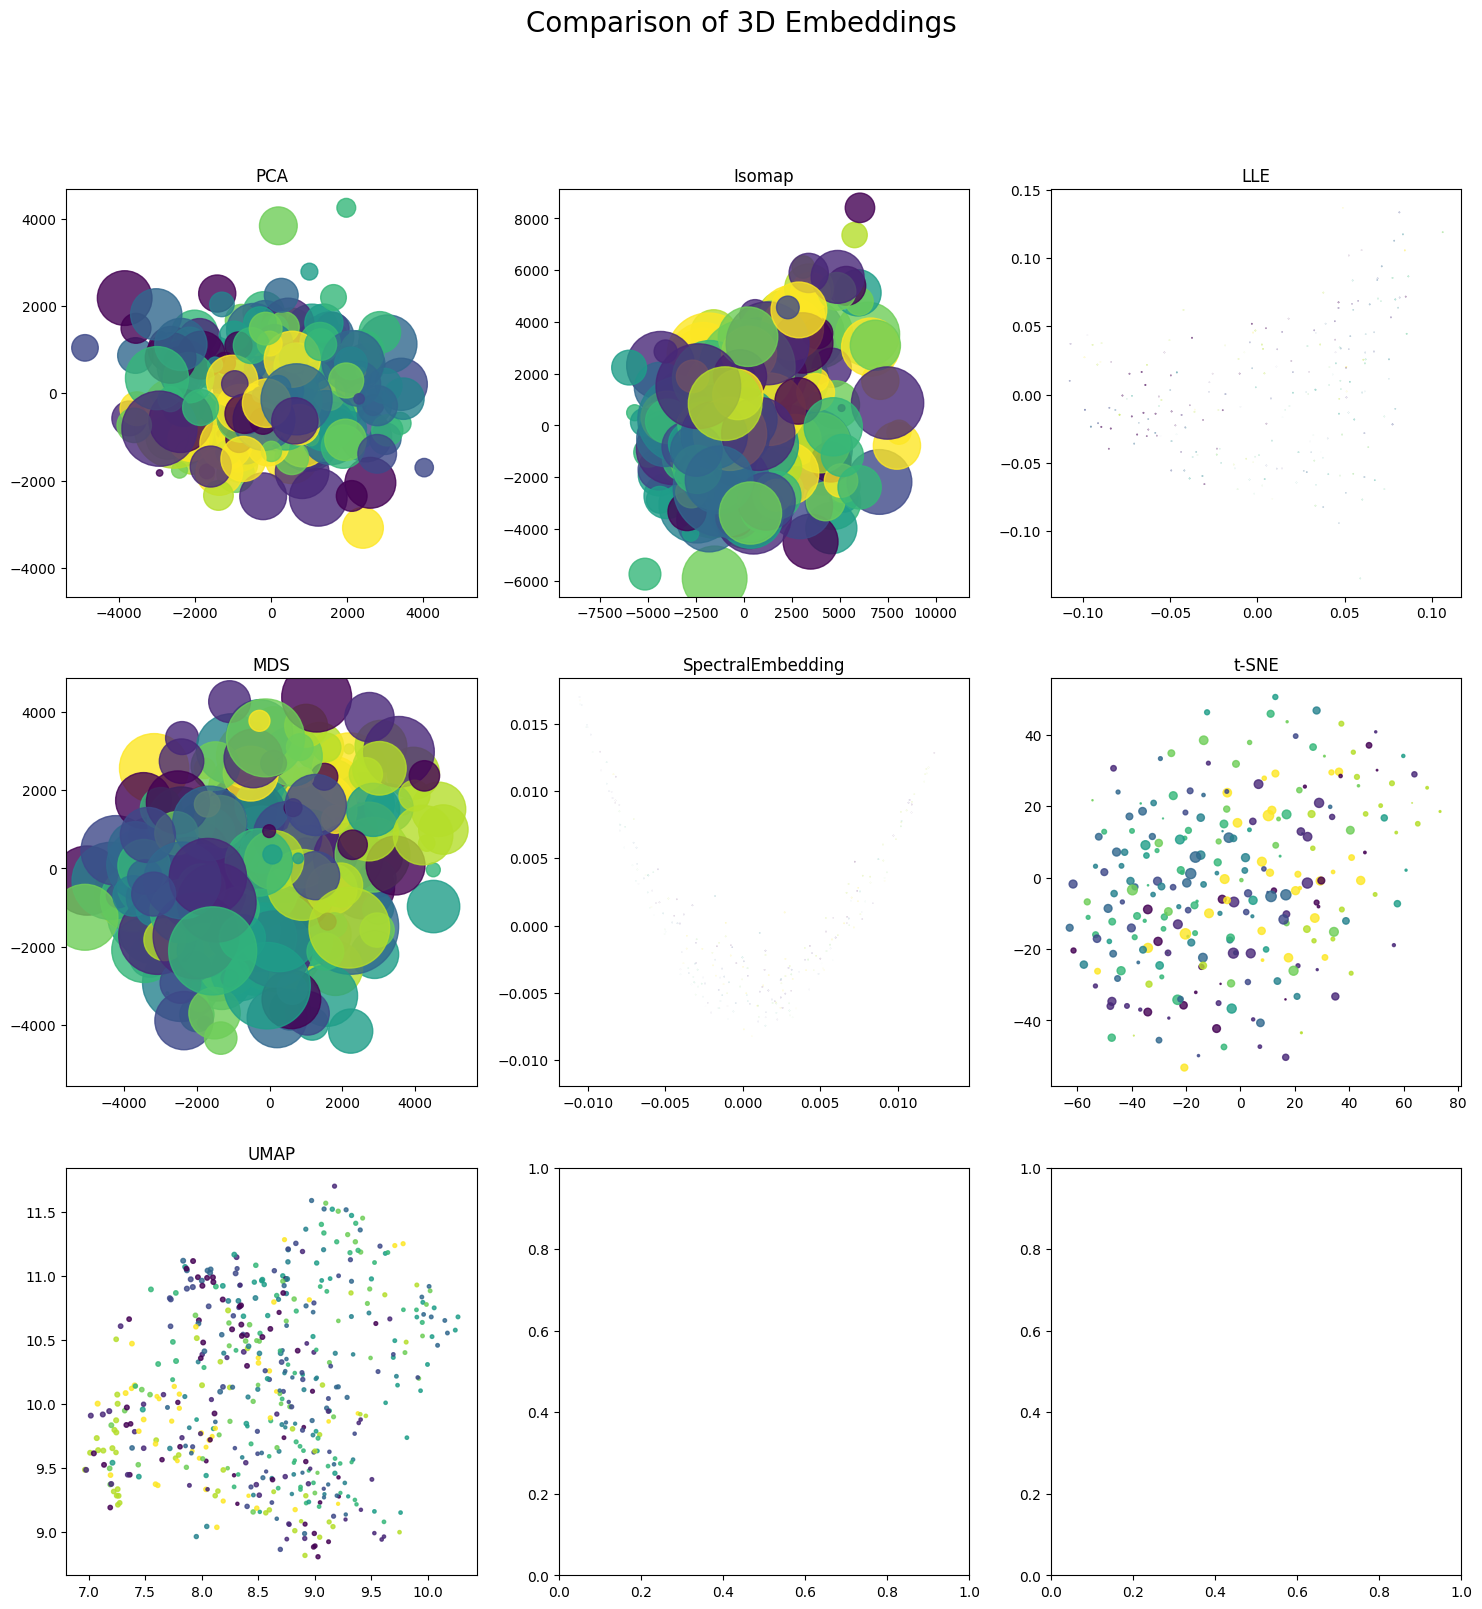

In [57]:
# Plot 3D embeddings for comparison
plot_3d_comparison({name: data for name, data in zip(manifold_algorithms.keys(), transformed_data)}, y_train)


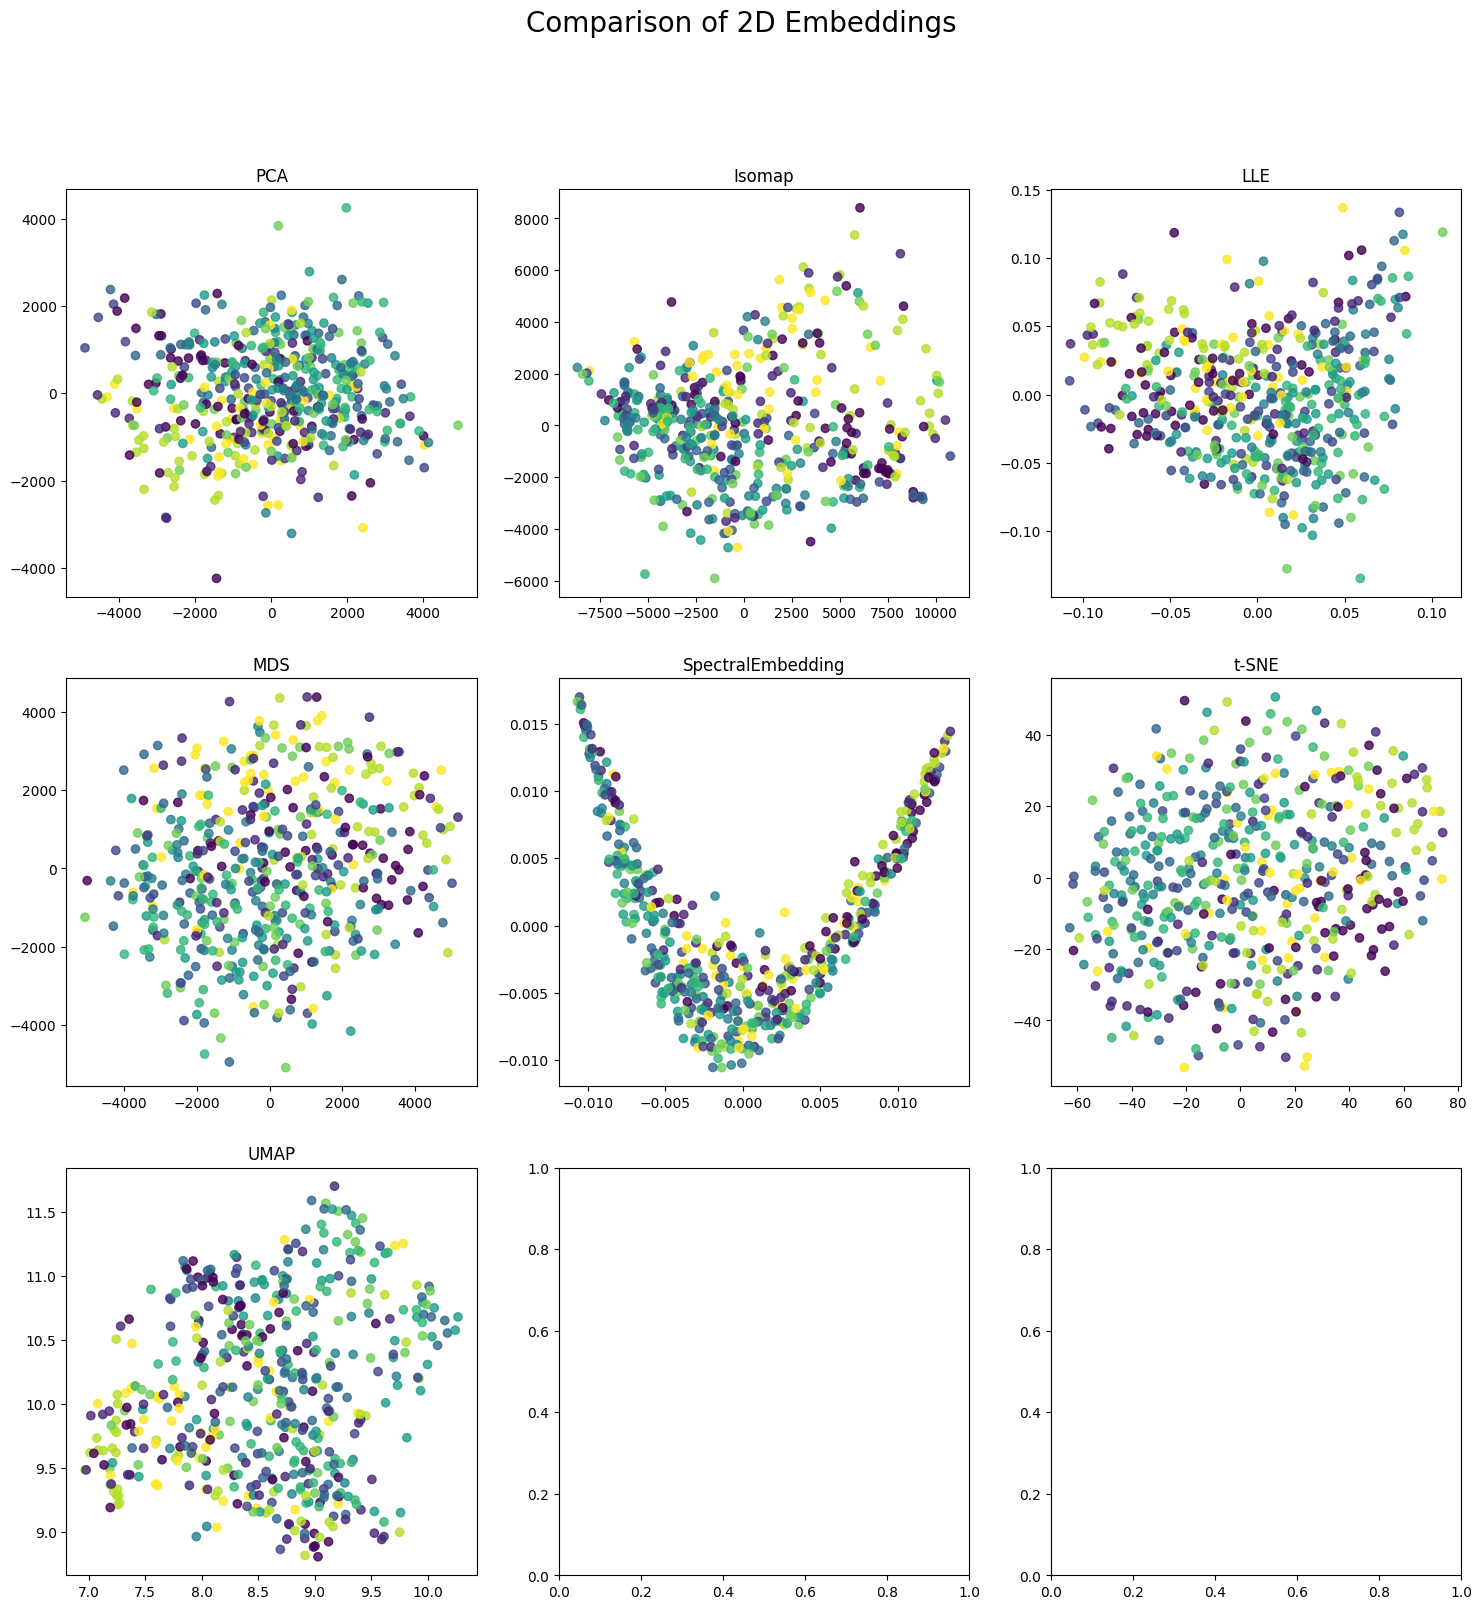

In [58]:
# Plot 2D embeddings for comparison
plot_2d_comparison({name: data for name, data in zip(manifold_algorithms.keys(), transformed_data)}, y_train)